# Cloud segmentation

In [4]:
import numpy as np
import os
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [5]:
images_dir = './images'
masks_dir = './masks'
images_path = os.listdir(images_dir)

## K-means Algorithm

In [6]:
def kmeans_segmentation(image_path, num_clusters, convert_to_gray=False):
    # Abrir a imagem
    image = Image.open(image_path)
    
    # Converter para tons de cinza, se necessário
    if convert_to_gray:
        image = image.convert('L')

    # Converte a imagem para um array numpy
    image_array = np.array(image)

    # Obtém a forma da imagem
    rows, cols = 0, 0
    num_channels = 1
    if len(image_array.shape) > 2:
        rows, cols, _ = image_array.shape
        num_channels = image_array.shape[2]
    else:
        rows, cols = image_array.shape


    # Redimensiona o array para que cada pixel seja uma amostra
    image_array_flat = image_array.reshape((-1, num_channels))
    
    # Aplica o algoritmo K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(image_array_flat)
    
    # Obtém os rótulos dos clusters para cada pixel
    labels = kmeans.labels_
    # Obtém os centróides dos clusters
    centroids = kmeans.cluster_centers_
    
    # Atualiza os valores dos pixels na imagem original com base nos centróides dos clusters
    segmented_image_array_flat = centroids[labels]

    # Redimensiona a imagem segmentada de volta para a forma original
    segmented_image_array = []
    if convert_to_gray:
        segmented_image_array = segmented_image_array_flat.reshape((rows, cols))
    else:
        segmented_image_array = segmented_image_array_flat.reshape((rows, cols, num_channels))

    return segmented_image_array.astype('uint8')



In [7]:
def apply_and_vizualize(algorithm, num_clusters, images_path):

    for image_path in images_path:
        fig = plt.figure(figsize=(15, 15))
        result_rgb = algorithm(f'{images_dir}/{image_path}', num_clusters)
        result_gray_scale = algorithm(f'{images_dir}/{image_path}', num_clusters, convert_to_gray=True)


        fig.add_subplot(1, 3, 1)
        image = Image.open(f'{images_dir}/{image_path}')        
        plt.imshow(np.array(image))
        plt.title("Original Image")
        plt.axis("off")

        fig.add_subplot(1, 3, 2)
        plt.imshow(np.array(result_rgb))
        plt.title("RGB Image Result")
        plt.axis("off")

        fig.add_subplot(1, 3, 3)
        plt.imshow(np.array(result_gray_scale))
        plt.title("Gray Scale Image Result")
        plt.axis("off")



/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

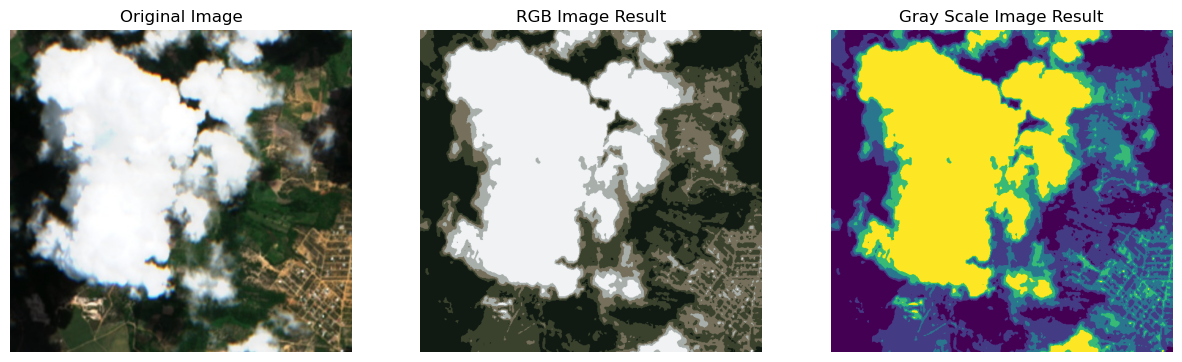

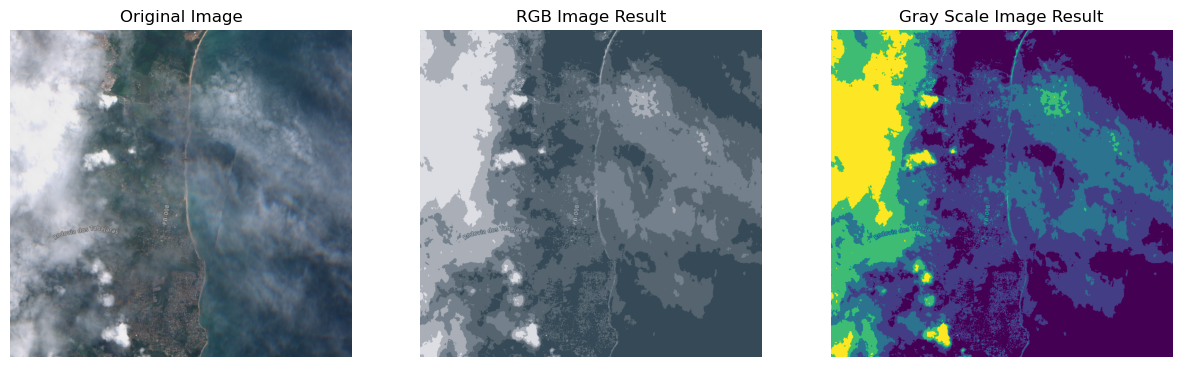

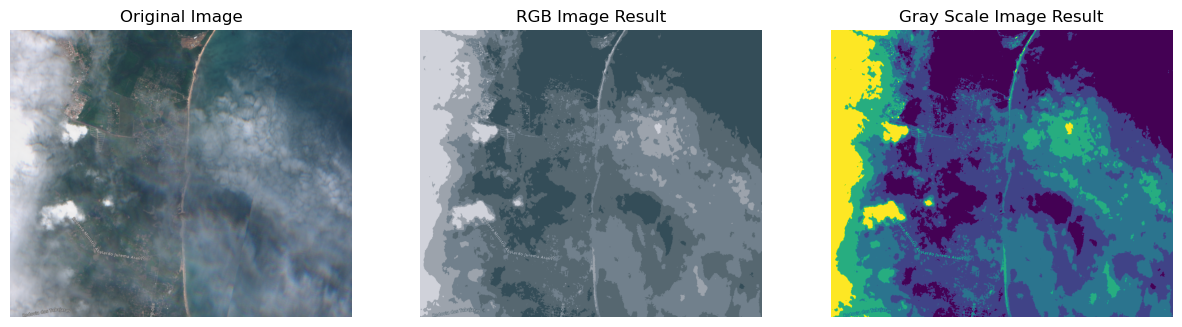

In [8]:
apply_and_vizualize(algorithm=kmeans_segmentation, num_clusters=5, images_path=images_path)

## GMM(Gausian Mixture Model) Algorithm

In [9]:

def gmm_segmentation(image_path, num_clusters, convert_to_gray=False):
    # Abrir a imagem
    image = Image.open(image_path)
    
    # Converter para tons de cinza, se necessário
    if convert_to_gray:
        image = image.convert('L')

    # Converte a imagem para um array numpy
    image_array = np.array(image)

    # Obtém a forma da imagem
    rows, cols = 0, 0
    num_channels = 1
    if len(image_array.shape) > 2:
        rows, cols, _ = image_array.shape
        num_channels = image_array.shape[2]
    else:
        rows, cols = image_array.shape
    # Redimensiona o array para que cada pixel seja uma amostra
    image_array_flat = image_array.reshape((-1, num_channels))
    
    # Aplica o algoritmo GMM
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(image_array_flat)
    
    # Obtém os rótulos dos clusters para cada pixel
    labels = gmm.predict(image_array_flat)
    # Obtém as médias dos componentes para os clusters
    means = gmm.means_
    
    # Atualiza os valores dos pixels na imagem original com base nas médias dos componentes dos clusters
    segmented_image_array_flat = means[labels]

    # Redimensiona a imagem segmentada de volta para a forma original
    segmented_image_array = []
    if convert_to_gray:
        segmented_image_array = segmented_image_array_flat.reshape((rows, cols))
    else:
        segmented_image_array = segmented_image_array_flat.reshape((rows, cols, num_channels))


    # Converte o array numpy de volta para uma imagem PIL
    return segmented_image_array.astype('uint8')


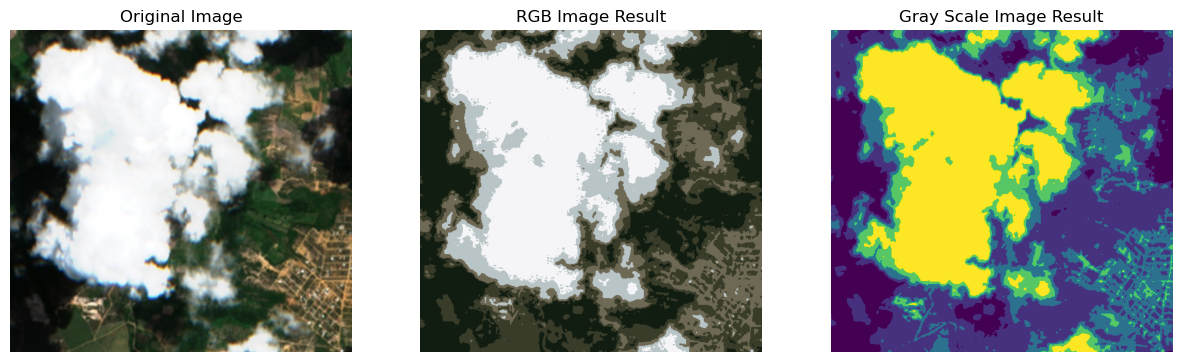

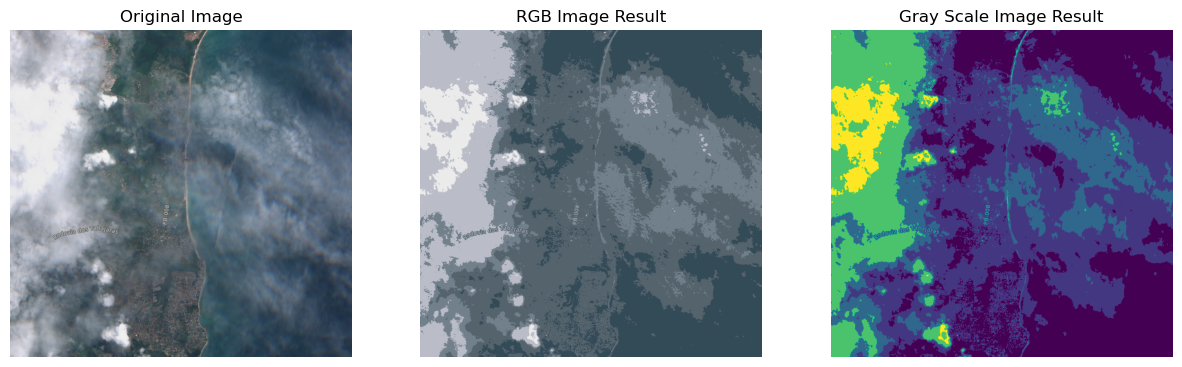

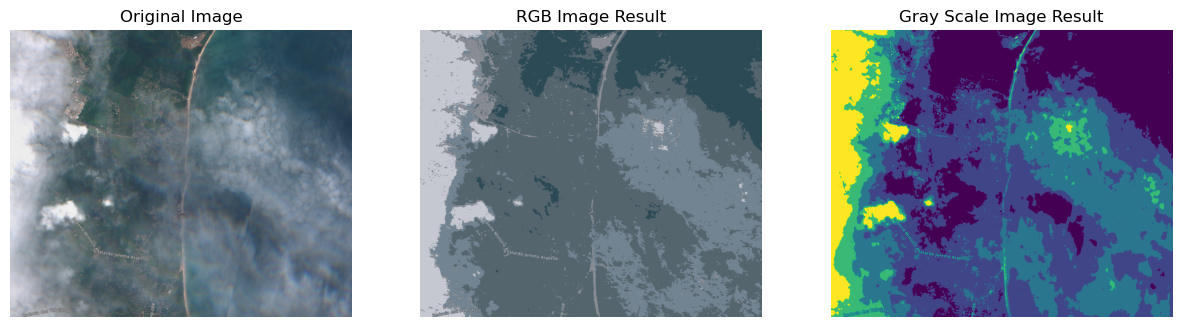

In [10]:
apply_and_vizualize(algorithm=gmm_segmentation, num_clusters=5, images_path=images_path)

### Experimenting Other Values Oo Numers Of Clusters

#### 2 Clusters

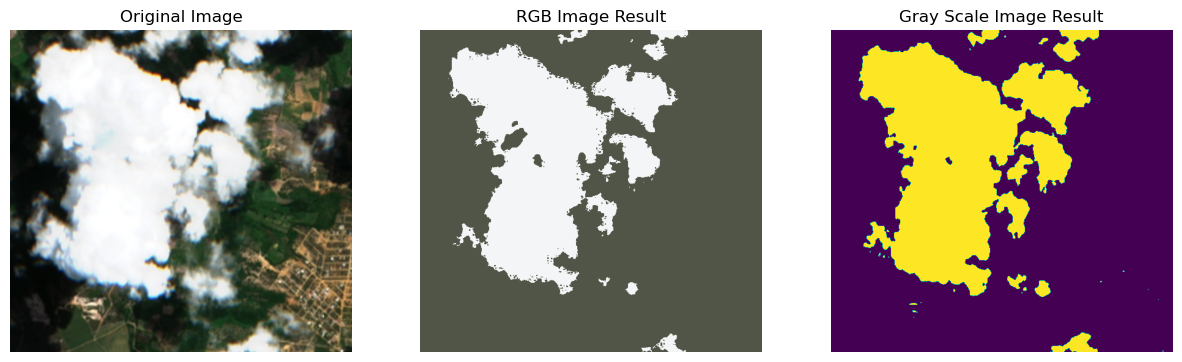

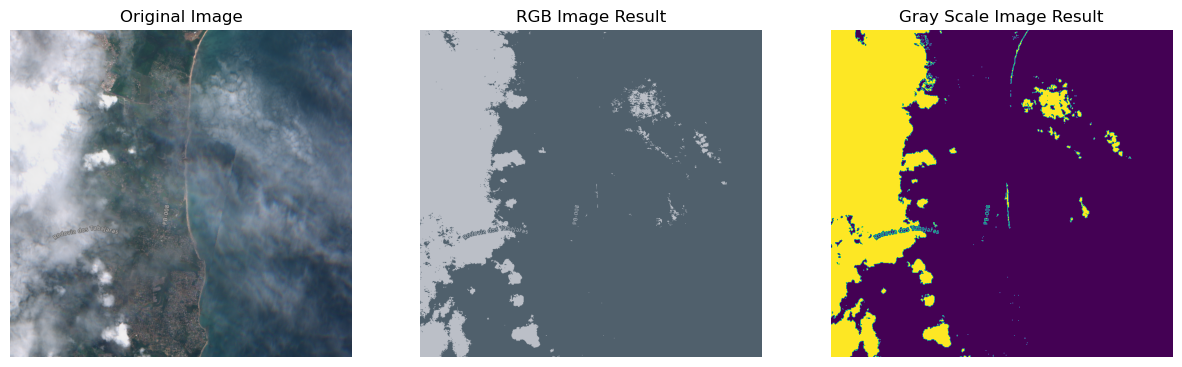

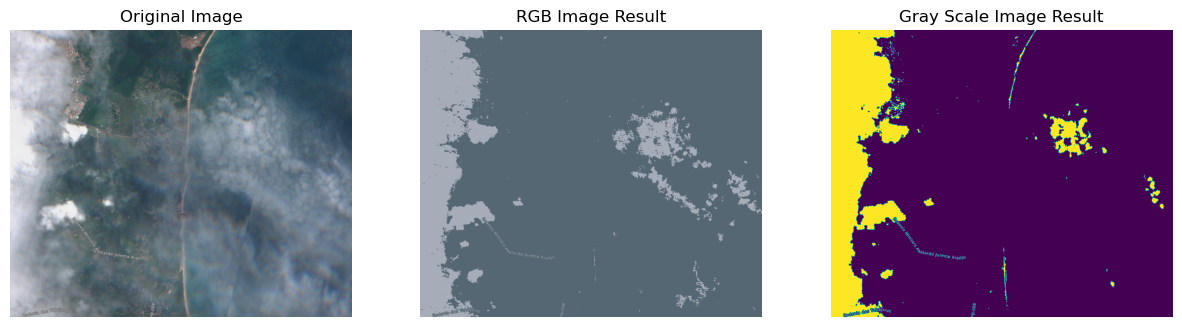

In [11]:
apply_and_vizualize(algorithm=gmm_segmentation, num_clusters=2, images_path=images_path)

/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

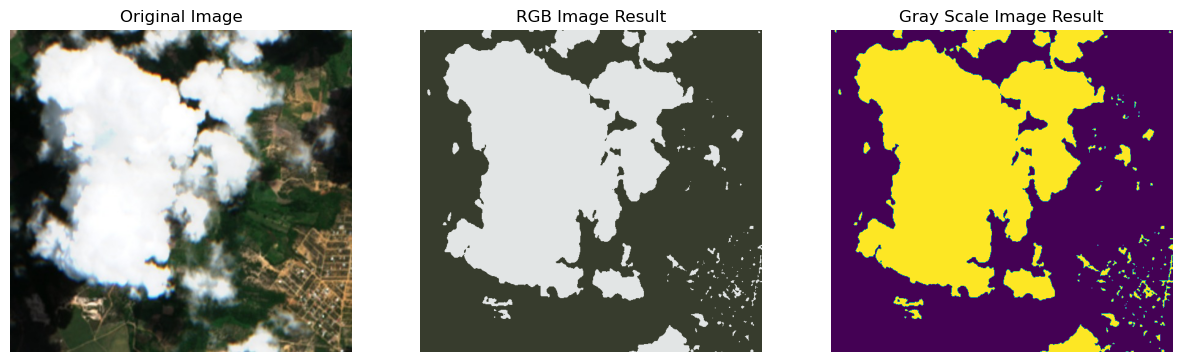

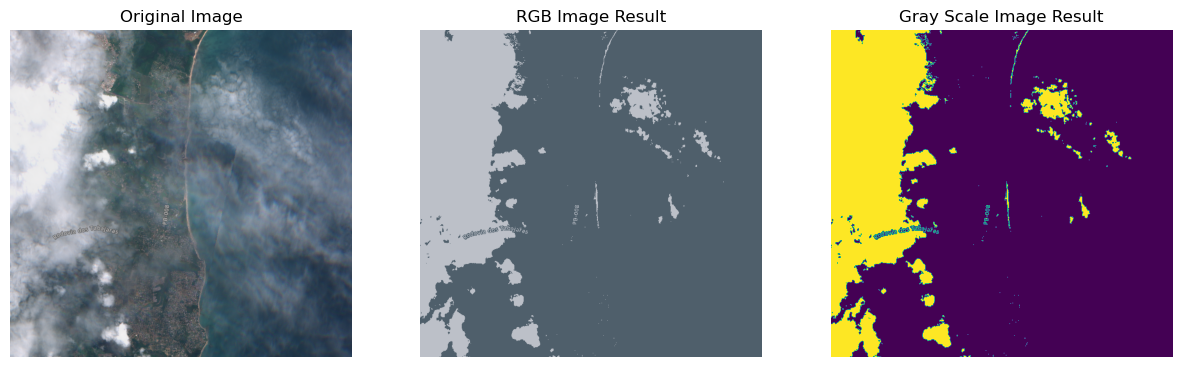

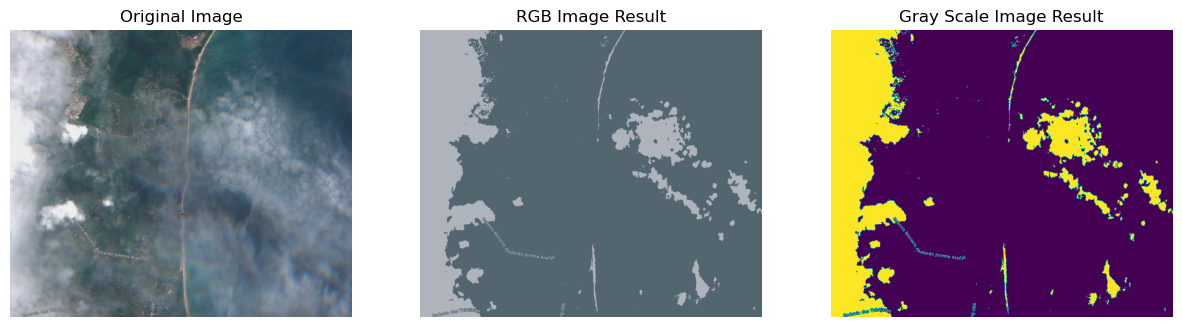

In [12]:
apply_and_vizualize(algorithm=kmeans_segmentation, num_clusters=2, images_path=images_path)

#### 3 Clusters

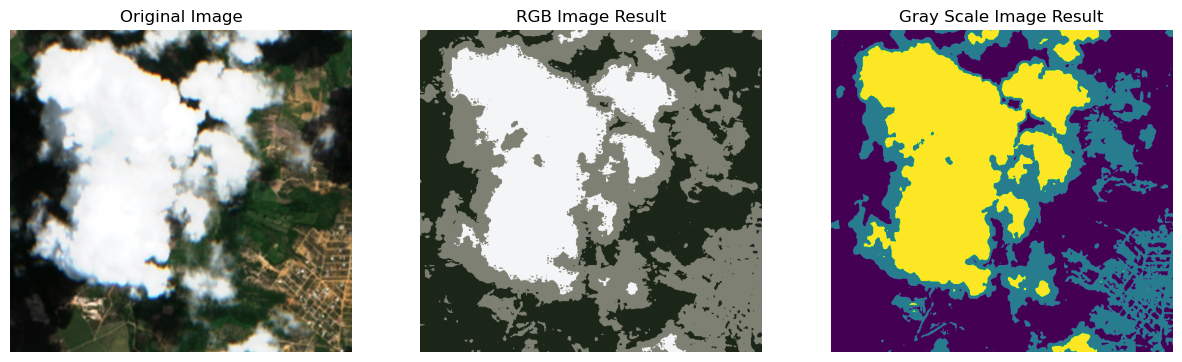

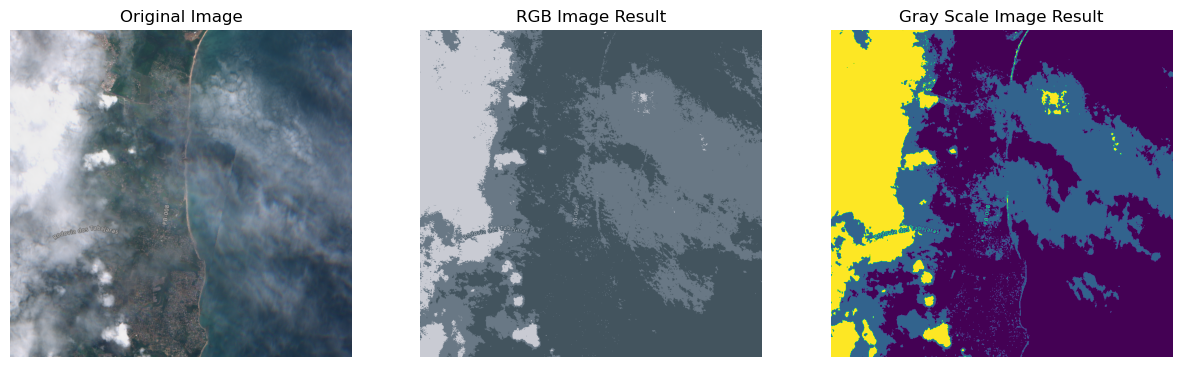

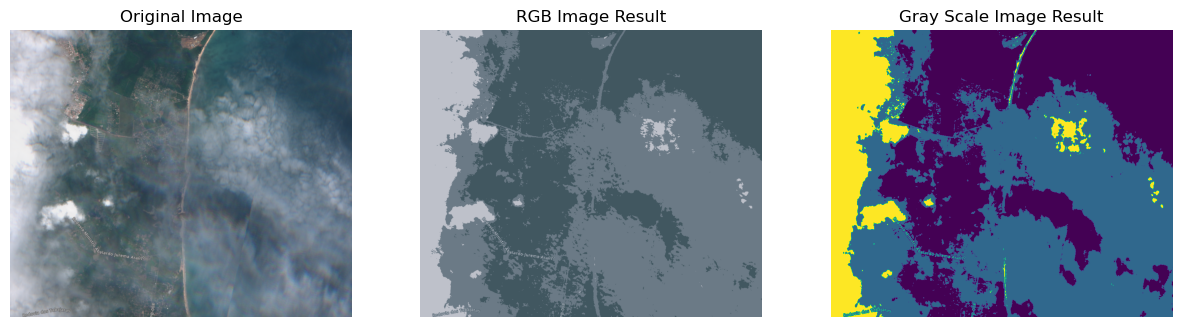

In [15]:
apply_and_vizualize(algorithm=gmm_segmentation, num_clusters=3, images_path=images_path)

/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/weverton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

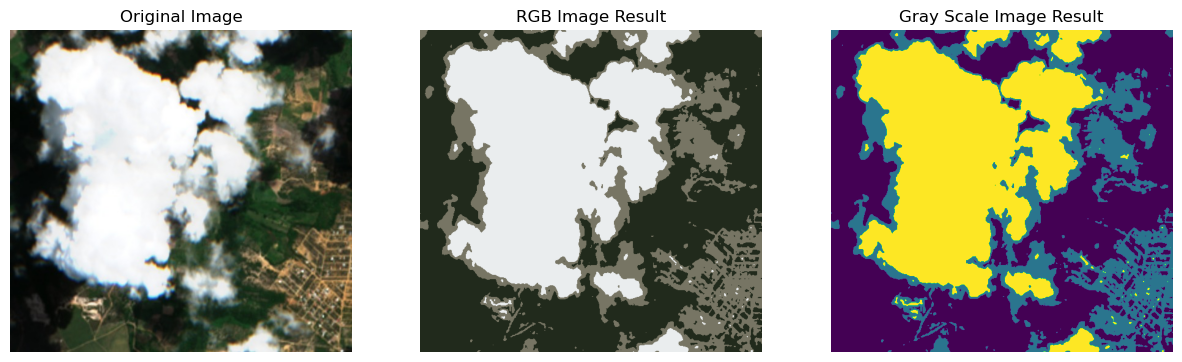

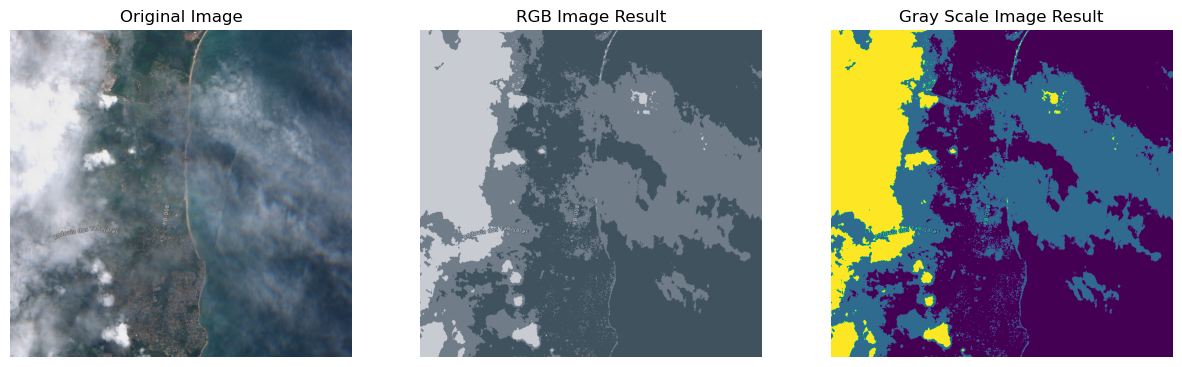

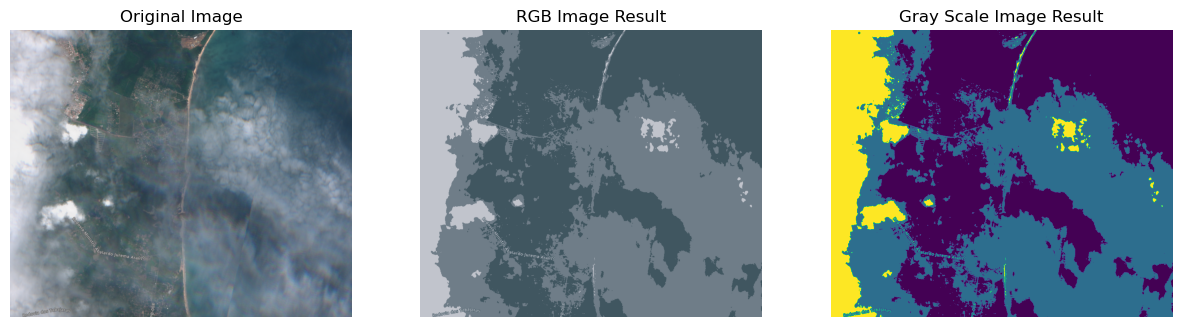

In [16]:
apply_and_vizualize(algorithm=kmeans_segmentation, num_clusters=3, images_path=images_path)